In [1]:
import os
import scanpy as sc
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager
output = '/home/carsten/alvira_bioinformatics/hif1a_tagln/data/output'
sc.settings.figdir = output
sc.set_figure_params(fontsize=12, dpi = 300)
os.makedirs(output, exist_ok = True)
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.sans-serif']=['Helvetica']
plt.rcParams['pdf.fonttype'] = 'truetype'


In [2]:
for x in [sc, pd, np, sns]:
    print(x.__name__)
    print(x.__version__)

scanpy
1.9.1
pandas
1.3.5
numpy
1.21.6
seaborn
0.12.0


# Data from GSE159804 & GSE172251
## Data came as raw counts, with cells/genes already filtered in original paper
### Just need to scale the counts and adjust metadata

In [3]:
mes_adata = sc.read_csv('/home/carsten/alvira_bioinformatics/hif1a_tagln/data/GSE172251_table_counts_lungmese.tsv.gz',
                  delimiter='\t').T
metadata = pd.read_csv('/home/carsten/alvira_bioinformatics/hif1a_tagln/data/GSE172251_table_cellmetadata_lungmese.tsv.gz',
                      delimiter='\t',
                      index_col=0)
mes_adata.obs = metadata
mes_adata.obs['Cell Subtype'].replace({'Early adventitial fibroblast': 'Adventitial fibroblast',
                                  'Early alveolar fibroblast': 'Alveolar fibroblast',
                                  'Early airway smooth muscle': 'Airway smooth muscle'}, inplace=True)#combine cell types over time
abv_dict = {'Airway smooth muscle':'ASM', 
            'Myofibroblast':'MyoFib', 
            'Alveolar fibroblast':'AlvFib',
            'Proliferating myofibroblast': 'Prolif MyoFib',
            'Vascular smooth muscle':'VSM',
            'Pericyte':'Peri', 
            'Proliferating fibroblast':'Prolif Fib', 
            'Adventitial fibroblast': 'AdvFib',
            'Proliferating pericyte': 'Prolif Peri',
            'Myofibroblast and smooth muscle precursor': 'PreASM/MyoF', 
            'Striated muscle': 'StriaMusc',
            'Fibroblast precursor':'PreFib', 
            'Male hyperoxic fibroblast':'MHF'
           }
mes_adata.obs['Cell Subtype'].replace(abv_dict, inplace = True)
mes_adata = mes_adata[mes_adata.obs['Cell Subtype'] != 'StriaMusc']
sc.pp.normalize_total(mes_adata, target_sum=1e6)
sc.pp.log1p(mes_adata, base=2)

/home/carsten/anaconda3/envs/tagln_hif1a/lib/python3.7/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [4]:
end_adata = sc.read_csv('/home/carsten/alvira_bioinformatics/hif1a_tagln/data/GSE159804_table_counts_lungendo.tsv.gz',
                  delimiter='\t').T
metadata = pd.read_csv('/home/carsten/alvira_bioinformatics/hif1a_tagln/data/GSE159804_table_cellmetadata_lungendo.tsv.gz',
                      delimiter='\t',
                      index_col=0)
end_adata.obs = metadata
end_adata.obs['Cell Subtype'].replace({'Early Car4- capillaries': 'Car4- capillarites',
                                  'Late Car4- capillaries': 'Car4- capillarites'}, inplace=True) #combine cell types over time
endo_abv_dict = {'Arterial EC I':'ArtI',
 'Arterial EC II':'ArtII',
 'Car4+ capillaries':'Aero',
 'Car4- capillarites':'gCap',
 'Lymphatic EC':'Lymph',
 'Nonproliferative embryonic EC':"Embryonic",
 'Proliferative EC':'Prolif EC',
 'Proliferative venous EC':'Prolif Vein',
 'Venous EC':'Vein'}
end_adata.obs['Cell Subtype'].replace(endo_abv_dict, inplace = True)
sc.pp.normalize_total(end_adata, target_sum=1e6)
sc.pp.log1p(end_adata, base=2)
sorted(end_adata.obs['Cell Subtype'].unique())

['Aero',
 'ArtI',
 'ArtII',
 'Embryonic',
 'Lymph',
 'Prolif EC',
 'Prolif Vein',
 'Vein',
 'gCap']

## Figure 1 
### dotplot of Hif1a/Tagln expressing mesenchymal 

/home/carsten/anaconda3/envs/tagln_hif1a/lib/python3.7/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/carsten/anaconda3/envs/tagln_hif1a/lib/python3.7/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/carsten/anaconda3/envs/tagln_hif1a/lib/python3.7/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/carsten/anaconda3/envs/tagln_hif1a/lib/python3.7/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


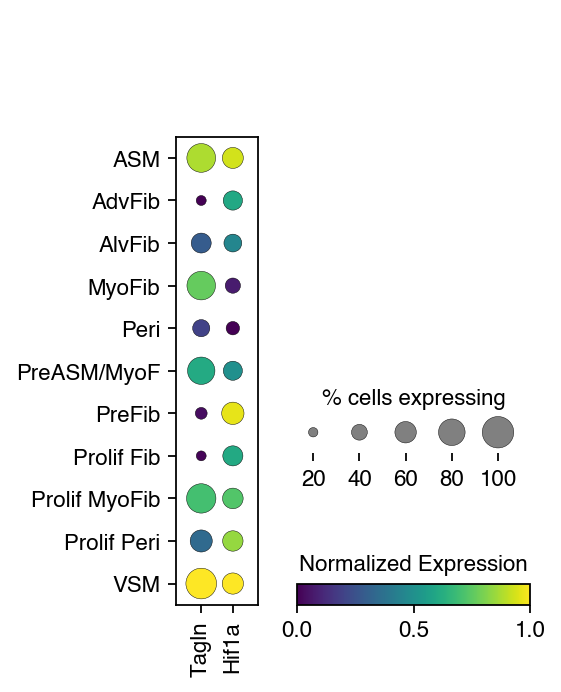

In [5]:
sc.set_figure_params(fontsize=12)
norm_mes_adata = mes_adata[mes_adata.obs['Treatment'] == 'normal', :]
sc.pl.DotPlot(norm_mes_adata,
              ['Tagln','Hif1a'],
              standard_scale='var',
              groupby = 'Cell Subtype').legend(width = 2.1,size_title='% cells expressing',colorbar_title= 'Normalized Expression').style(cmap='viridis', y_padding=0.5, largest_dot=200).savefig(os.path.join(output,f'dotplot_fig1_hif1a_tagln.png'), dpi = 300)


In [6]:
abv_dict = {'Airway smooth muscle':'ASM', 
            'Myofibroblast':'MyoFib', 
            'Alveolar fibroblast':'AlvFib',
            'Proliferating myofibroblast': 'Prolif MyoFib',
            'Vascular smooth muscle':'VSM',
            'Pericyte':'Peri', 
            'Proliferating fibroblast':'Prolif Fib', 
            'Adventitial fibroblast': 'AdvFib',
            'Proliferating pericyte': 'Prolif Peri',
            'Myofibroblast and smooth muscle precursor': 'PreASM/MyoF', 
            'Striated muscle': 'StriaMusc',
            'Fibroblast precursor':'PreFib', 
            'Male hyperoxic fibroblast':'MHF'
           }
for x in sorted(abv_dict.keys()):
    print(f'{x} ({abv_dict[x]}),')
for x in sorted(endo_abv_dict.keys()):
    print(f'{x} ({endo_abv_dict[x]}),')

Adventitial fibroblast (AdvFib),
Airway smooth muscle (ASM),
Alveolar fibroblast (AlvFib),
Fibroblast precursor (PreFib),
Male hyperoxic fibroblast (MHF),
Myofibroblast (MyoFib),
Myofibroblast and smooth muscle precursor (PreASM/MyoF),
Pericyte (Peri),
Proliferating fibroblast (Prolif Fib),
Proliferating myofibroblast (Prolif MyoFib),
Proliferating pericyte (Prolif Peri),
Striated muscle (StriaMusc),
Vascular smooth muscle (VSM),
Arterial EC I (ArtI),
Arterial EC II (ArtII),
Car4+ capillaries (Aero),
Car4- capillarites (gCap),
Lymphatic EC (Lymph),
Nonproliferative embryonic EC (Embryonic),
Proliferative EC (Prolif EC),
Proliferative venous EC (Prolif Vein),
Venous EC (Vein),


# Figure 2
## Coexpression of Hif1a and Tagln, Pdgfra 

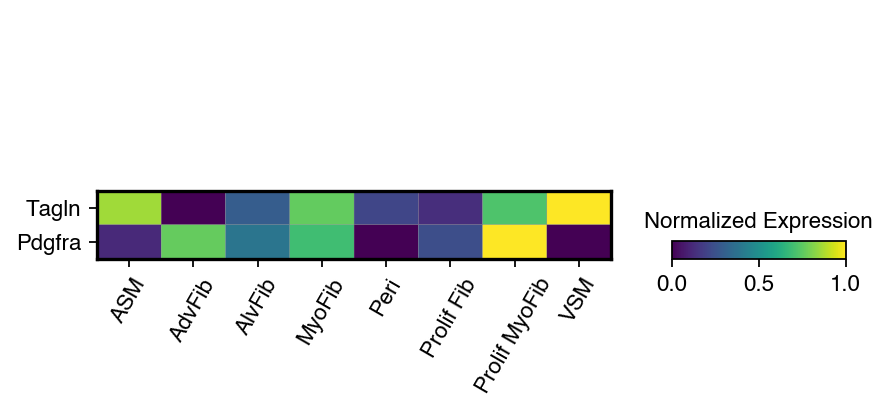

In [7]:
sc.set_figure_params(fontsize=12)

p1_p7_mes_adata = norm_mes_adata[norm_mes_adata.obs['Timepoint'].isin(['P1','P7','P21']),:]
ge_20_cells = p1_p7_mes_adata.obs['Cell Subtype'].value_counts() >= 20
genes = ['Tagln',
#          'Hif1a',
         'Pdgfra']
cts = sorted(ge_20_cells.loc[ge_20_cells == True].index)
p1_p7_mes_adata = p1_p7_mes_adata[p1_p7_mes_adata.obs['Cell Subtype'].isin(cts),:]
fig, ax = plt.subplots(1,1,figsize = (6,2))
dp_object = sc.pl.MatrixPlot(p1_p7_mes_adata,
                 genes,
                 standard_scale='var',
                 ax = ax,
                 groupby = ['Cell Subtype']).swap_axes().legend(width = 1, title='Normalized Expression').style(cmap='viridis').get_axes()
dp_object['mainplot_ax'].set_xticklabels(sorted(p1_p7_mes_adata.obs['Cell Subtype'].unique()), 
                                         rotation = 60)
fig.savefig(os.path.join(output,f'matrixplot_fig2_pdgfra_angpt2_long.png'), dpi = 300)

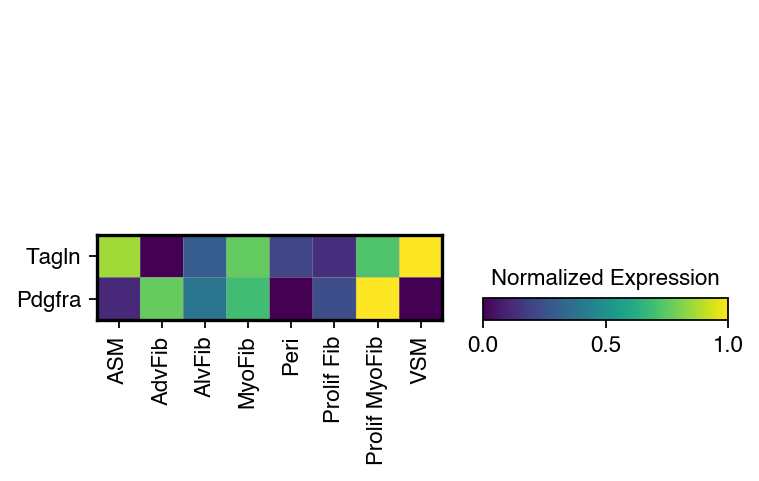

In [8]:
sc.pl.MatrixPlot(p1_p7_mes_adata,
                 ['Tagln', 'Pdgfra'],
                 standard_scale='var',
                 groupby = ['Cell Subtype']).swap_axes().legend(width = 2.1, title='Normalized Expression').style(cmap='viridis').savefig(os.path.join(output,f'matrixplot_fig2_pdgfra_angpt2.png'), dpi = 300)

## Figure 4
### Angpt2 expression

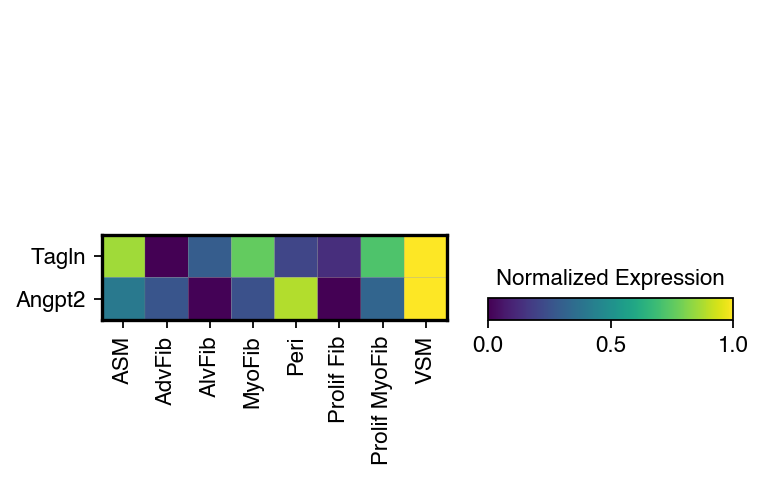

In [9]:
sc.pl.MatrixPlot(p1_p7_mes_adata,
                 ['Tagln', 'Angpt2'],
                 standard_scale='var',
                 groupby = ['Cell Subtype']).swap_axes().legend(width = 2.1, title='Normalized Expression').style(cmap='viridis').savefig(os.path.join(output,f'matrixplot_fig4_tagln_angpt2.png'), dpi = 300)

## Figure 5 / Supplemental
### Angpt signaling in mesenchyme and endothelium

/home/carsten/anaconda3/envs/tagln_hif1a/lib/python3.7/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


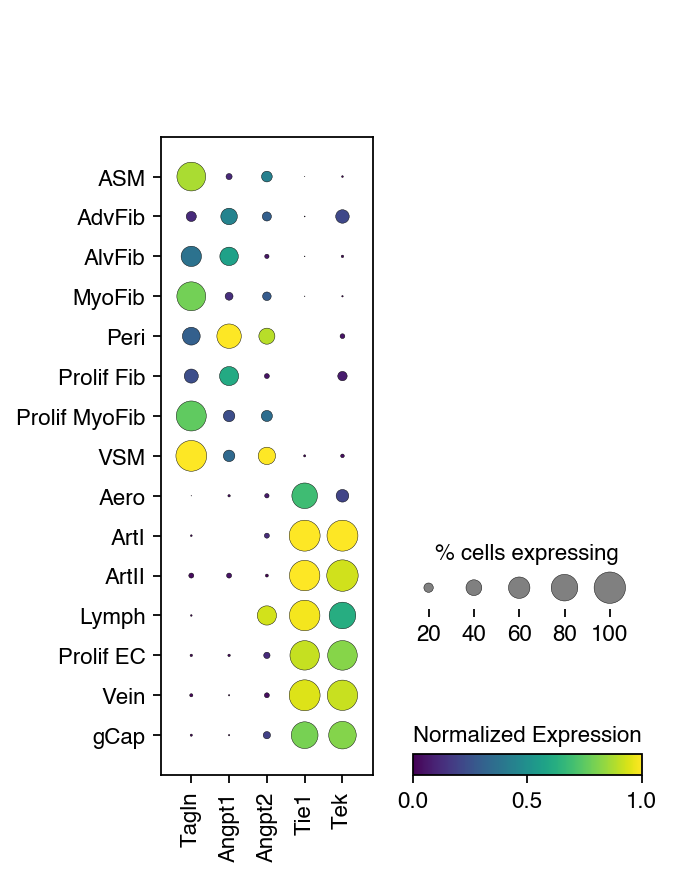

In [10]:


norm_end_adata = end_adata[end_adata.obs['Treatment'] == 'normal', :]
p1_p7_end_adata = norm_end_adata[norm_end_adata.obs['Timepoint'].isin(['P1','P7','P21']),:]
ge_20_cells = p1_p7_end_adata.obs['Cell Subtype'].value_counts() >= 20
cts = sorted(ge_20_cells.loc[ge_20_cells == True].index)
p1_p7_end_adata = p1_p7_end_adata[p1_p7_end_adata.obs['Cell Subtype'].isin(cts),:]



norm_adata = p1_p7_end_adata.concatenate(p1_p7_mes_adata)
order = sorted(p1_p7_mes_adata.obs['Cell Subtype'].unique()) + sorted(p1_p7_end_adata.obs['Cell Subtype'].unique())
sc.pl.DotPlot(norm_adata,
              ['Tagln','Angpt1', 'Angpt2', 'Tie1', 'Tek'],
              categories_order=order,
              standard_scale='var',
              groupby = 'Cell Subtype').legend(width = 2, size_title='% cells expressing',colorbar_title= 'Normalized Expression').style(cmap='viridis').savefig(os.path.join(output,f'dotplotplot_fig4_endo_angpt2_receptors.png'), dpi = 300)
